In [1]:
# INstalling the package used to forecast
!pip install neuralprophet

In [2]:
# Importing os to help me deal with the kernel error message, "The kernel appears to have died. It will restart automatically"
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Importing necessary libraries of python to visualize, manipulate and save my dataset
from matplotlib import pyplot as plt
import pandas as pd
from neuralprophet import NeuralProphet
import pickle

In [4]:
# reading the data from a csv file stored on the local machine
df = pd.read_csv('weather.csv')
# Showing the first rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# Showing last rows of my dataset
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
# Showing the unique location to choose my place of focus
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
# Showing the columns that the dataset has
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# The types of columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
# As we saw, date is just an object meaning python can't treat it as date. So I need to change its type so that I can be able 
# forecast in Sydney. Meaning I'll show data from Sydney only with date type changed
sydney_ = df[df['Location']=='Sydney']
sydney_['Date'] = pd.to_datetime(sydney_['Date'])

# Showing the heads of my dataset now
sydney_.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Local\Temp/ipykernel_11816/2864830423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sydney_['Date'] = pd.to_datetime(sydney_['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [10]:
# Checking if the type of Date has been changed
sydney_.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

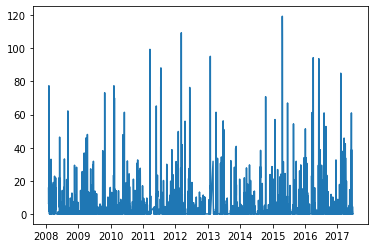

In [11]:
# Plotting the graph of Sydney with Date on x-axis and the amount of Rainfall on y-axis
plt.plot(sydney_['Date'], sydney_['Rainfall'])
plt.show()

In [12]:
# Checking the first rows of the dataset
sydney_.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [13]:
# Dropping other columns except that of Rainfal and the date
data = sydney_[['Date', 'Rainfall']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
30176,2008-02-01,15.6
30177,2008-02-02,6.0
30178,2008-02-03,6.6
30179,2008-02-04,18.8
30180,2008-02-05,77.4


In [14]:
# Checking the last row of the dataset
data.tail()

,ds,y
33515,2017-06-21,0.0
33516,2017-06-22,0.0
33517,2017-06-23,0.0
33518,2017-06-24,0.0
33519,2017-06-25,0.0


In [15]:
# Testing the model
m = NeuralProphet()
m.fit(data, freq='D', epochs=1500)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 8.04E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.69E-02
Epoch[1500/1500]: 100%|███████| 1500/1500 [06:21<00:00,  3.93it/s, SmoothL1Loss=0.0796, MAE=4.43, RMSE=8.64, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.163113,31.912467,39.511644,0.0
1,1.049447,29.529843,36.638435,0.0
2,0.942088,27.268695,33.851466,0.0
3,0.839915,25.103840,31.128140,0.0
4,0.742382,23.027798,28.665288,0.0
...,...,...,...,...
1495,0.079610,4.429382,8.444566,0.0
1496,0.079610,4.429333,8.514313,0.0
1497,0.079609,4.429320,8.634937,0.0
1498,0.079609,4.429235,8.725177,0.0


In [16]:
# Forecasting the rainfall in 1200 periods
future = m.make_future_dataframe(data, periods=1200)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,3.365406,NaN,2.624153,0.563076,0.178178
1,2017-06-27,None,2.793458,NaN,2.624038,0.451197,-0.281777
2,2017-06-28,None,3.356701,NaN,2.623924,0.339260,0.393517
3,2017-06-29,None,2.911988,NaN,2.623810,0.228091,0.060087
4,2017-06-30,None,2.553762,NaN,2.623695,0.118496,-0.188429


In [17]:
# Checking the last rows now
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1195,2020-10-03,None,1.820032,NaN,2.487545,-0.813088,0.145574
1196,2020-10-04,None,1.387982,NaN,2.487431,-0.792299,-0.307150
1197,2020-10-05,None,1.893083,NaN,2.487317,-0.772412,0.178178
1198,2020-10-06,None,1.451911,NaN,2.487202,-0.753515,-0.281777
1199,2020-10-07,None,2.144936,NaN,2.487088,-0.735669,0.393517


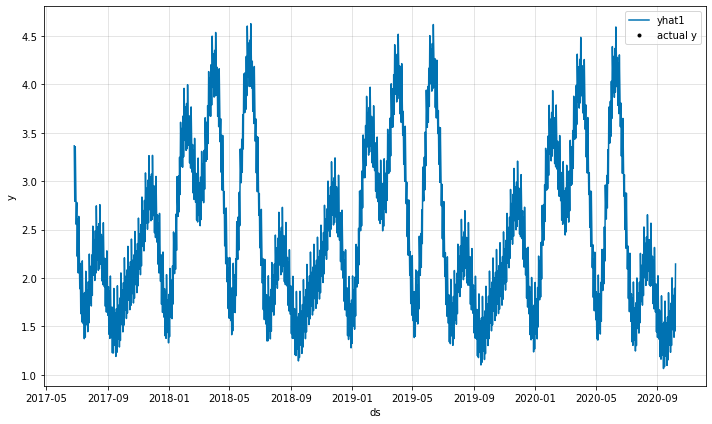

In [18]:

plot1 = m.plot(forecast)

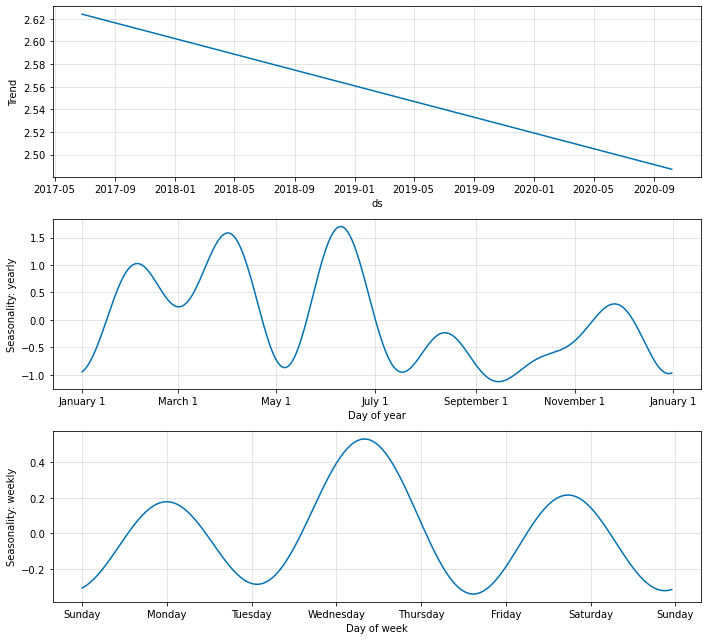

In [19]:
# Breaking down the graph above for better understanding
plt2 = m.plot_components(forecast)

In [20]:
# Creating a file to the model for future use
with open('save_forecasting.pkl', "wb") as f:
    pickle.dump(model, f)

In [21]:
# checking the model that we have created if it is truly a neuralprophet type
model

In [22]:
# Now we can forecast again using the model that we have just save on the disk
future = model.make_future_dataframe(data, periods=1999)
forecast = model.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,3.365406,NaN,2.624153,0.563076,0.178178
1,2017-06-27,None,2.793458,NaN,2.624038,0.451197,-0.281777
2,2017-06-28,None,3.356701,NaN,2.623924,0.339260,0.393517
3,2017-06-29,None,2.911988,NaN,2.623810,0.228091,0.060087
4,2017-06-30,None,2.553762,NaN,2.623695,0.118496,-0.188429


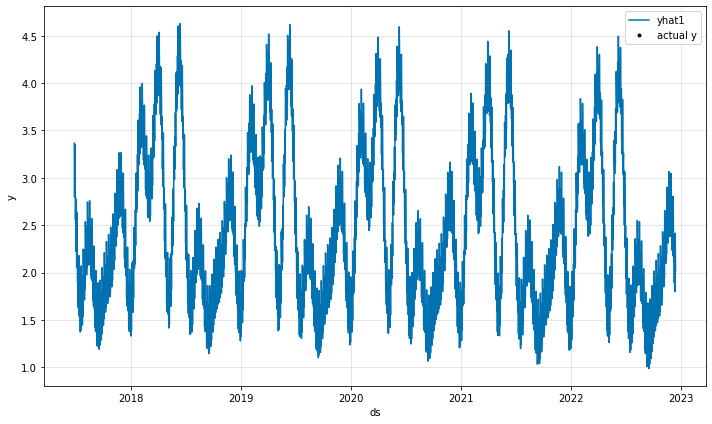

In [23]:
# Visualizing the graph 
plot1 = model.plot(forecast)